<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,0.000126,300.298680,300.298501,0.000179
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-0.001094,254.313162,254.314593,-0.001432
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-0.005563,322.041376,322.044168,-0.002791
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,0.001237,248.539309,248.536596,0.002713
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-0.001278,247.855142,247.855081,0.000061
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-0.005505,187.776281,187.777231,-0.000950
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-0.000441,269.070192,269.072228,-0.002036
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-0.000634,233.288886,233.288310,0.000576
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-0.007896,160.561539,160.568463,-0.006924


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,0.000126,300.298680,300.298501,0.000179
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-0.001094,254.313162,254.314593,-0.001432
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-0.005563,322.041376,322.044168,-0.002791
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,0.001237,248.539309,248.536596,0.002713
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-0.001278,247.855142,247.855081,0.000061
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-0.005505,187.776281,187.777231,-0.000950
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-0.000441,269.070192,269.072228,-0.002036
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-0.000634,233.288886,233.288310,0.000576
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-0.007896,160.561539,160.568463,-0.006924


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  0.000126  300.298680   
      1.0    62.341958  92.738979  37.239107  51.994211 -0.001094  254.313162   
      2.0    82.767350  34.887227  94.604833  99.787529 -0.005563  322.041376   
      3.0    49.539820  49.999782  53.122462  85.876007  0.001237  248.539309   
      4.0    98.457591  44.031028  65.231268  30.136533 -0.001278  247.855142   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -0.005505  187.776281   
      16.0   30.657670  99.609873  54.056862  74.746229 -0.000441  269.070192   
      17.0   57.560842  69.461073  38.185239  58.082366 -0.000634  233.288886   
      18.0   21.256972  23.348378  23.803154  82.160932 -0.007896  160.561539   
      19.0   42.077897  86.238056  76.790919  20.572005  0.000061  235.678938   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.298501  0.000179  
      1.0    254.314593 -0.001432  
      2.0    322.044168 -0.002791  
      3.0    248.536596  0.002713  
      4.0    247.855081  0.000061  
...                 ...       ...  
999.0 15.0   187.777231 -0.000950  
      16.0   269.072228 -0.002036  
      17.0   233.288310  0.000576  
      18.0   160.568463 -0.006924  
      19.0   235.676666  0.002272  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  0.000126  300.298680   
      1.0    62.341958  92.738979  37.239107  51.994211 -0.001094  254.313162   
      2.0    82.767350  34.887227  94.604833  99.787529 -0.005563  322.041376   
      3.0    49.539820  49.999782  53.122462  85.876007  0.001237  248.539309   
      4.0    98.457591  44.031028  65.231268  30.136533 -0.001278  247.855142   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -0.005505  187.776281   
      16.0   30.657670  99.609873  54.056862  74.746229 -0.000441  269.070192   
      17.0   57.560842  69.461073  38.185239  58.082366 -0.000634  233.288886   
      18.0   21.256972  23.348378  23.803154  82.160932 -0.007896  160.561539   
      19.0   42.077897  86.238056  76.790919  20.572005  0.000061  235.678938   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.298501  0.000179  
      1.0    254.314593 -0.001432  
      2.0    322.044168 -0.002791  
      3.0    248.536596  0.002713  
      4.0    247.855081  0.000061  
...                 ...       ...  
999.0 15.0   187.777231 -0.000950  
      16.0   269.072228 -0.002036  
      17.0   233.288310  0.000576  
      18.0   160.568463 -0.006924  
      19.0   235.676666  0.002272  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,0.000126,300.298680,300.298501,0.000179
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-0.001094,254.313162,254.314593,-0.001432
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-0.005563,322.041376,322.044168,-0.002791
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,0.001237,248.539309,248.536596,0.002713
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-0.001278,247.855142,247.855081,0.000061
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-0.005505,187.776281,187.777231,-0.000950
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-0.000441,269.070192,269.072228,-0.002036
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-0.000634,233.288886,233.288310,0.000576
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-0.007896,160.561539,160.568463,-0.006924


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  0.000126  300.298680   
      1.0    62.341958  92.738979  37.239107  51.994211 -0.001094  254.313162   
      2.0    82.767350  34.887227  94.604833  99.787529 -0.005563  322.041376   
      3.0    49.539820  49.999782  53.122462  85.876007  0.001237  248.539309   
      4.0    98.457591  44.031028  65.231268  30.136533 -0.001278  247.855142   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -0.005505  187.776281   
      16.0   30.657670  99.609873  54.056862  74.746229 -0.000441  269.070192   
      17.0   57.560842  69.461073  38.185239  58.082366 -0.000634  233.288886   
      18.0   21.256972  23.348378  23.803154  82.160932 -0.007896  160.561539   
      19.0   42.077897  86.238056  76.790919  20.572005  0.000061  235.678938   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.298501  0.000179  
      1.0    254.314593 -0.001432  
      2.0    322.044168 -0.002791  
      3.0    248.536596  0.002713  
      4.0    247.855081  0.000061  
...                 ...       ...  
999.0 15.0   187.777231 -0.000950  
      16.0   269.072228 -0.002036  
      17.0   233.288310  0.000576  
      18.0   160.568463 -0.006924  
      19.0   235.676666  0.002272  

[20000 rows x 8 columns]

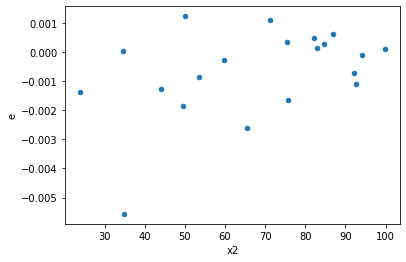

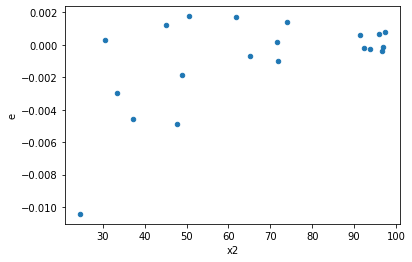

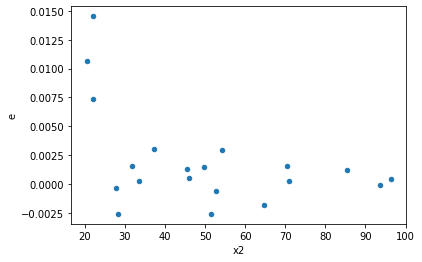

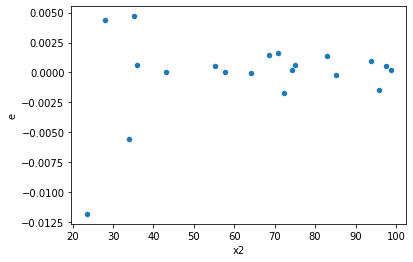

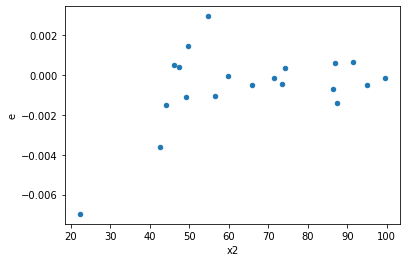

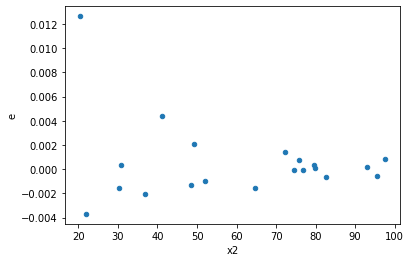

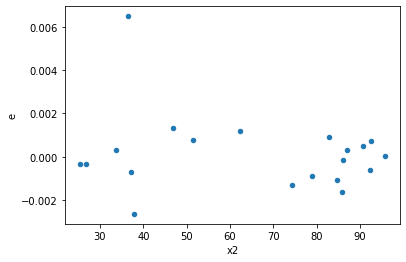

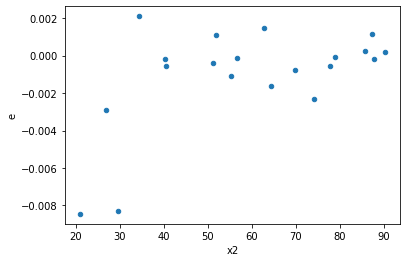

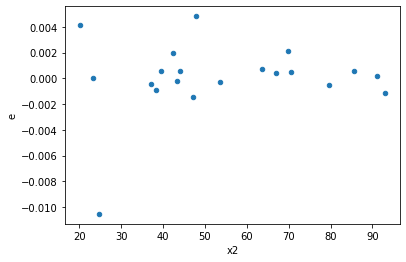

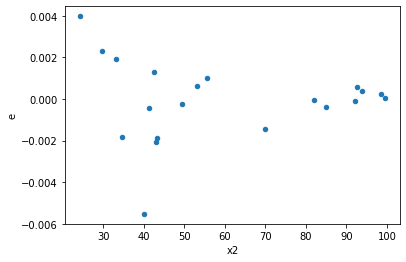

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
69.0,4.0,4.0,9.598883693853767e-06,1.0534644071491342e-05,2.3997209234634416e-06,2.6336610178728355e-06,1.097486375237232,0.9303336266604176,0.5348331866697912,0.4651668133302088,Reject005=1 : Homoscedasticity
117.0,4.0,4.0,4.119341354664878e-06,6.41949501046449e-06,1.0298353386662195e-06,1.6048737526161224e-06,1.5583789877463885,0.6778158253774904,0.6610920873112548,0.3389079126887452,Reject005=1 : Homoscedasticity
131.0,4.0,4.0,1.2522914560637066e-06,3.149662466063557e-06,3.1307286401592665e-07,7.874156165158892e-07,2.5151193444725757,0.3934957401286756,0.8032521299356622,0.1967478700643378,Reject005=1 : Homoscedasticity
138.0,4.0,4.0,6.6430804474773106e-06,6.98322025674628e-06,1.6607701118693276e-06,1.74580506418657e-06,1.0512021210578801,0.9625647669080555,0.5187176165459723,0.48128238345402774,Reject005=1 : Homoscedasticity
170.0,4.0,4.0,1.868205694690762e-06,5.404565918091001e-06,4.670514236726905e-07,1.3511414795227503e-06,2.8929180193862973,0.32811317996352973,0.8359434100182351,0.16405658998176487,Reject005=1 : Homoscedasticity
176.0,4.0,4.0,5.728911651146883e-06,7.368407035012489e-06,1.4322279127867207e-06,1.8421017587531223e-06,1.2861792053534973,0.8132138276447294,0.5933930861776353,0.4066069138223647,Reject005=1 : Homoscedasticity
178.0,4.0,4.0,2.6106772467127563e-06,6.783422947531363e-06,6.526693116781891e-07,1.6958557368828407e-06,2.598338402831194,0.37753792020531707,0.8112310398973415,0.18876896010265853,Reject005=1 : Homoscedasticity
272.0,4.0,4.0,1.916752470302005e-06,6.816605935065586e-06,4.791881175755013e-07,1.7041514837663965e-06,3.5563308464089554,0.2467275252149641,0.876636237392518,0.12336376260748205,Reject005=1 : Homoscedasticity
275.0,4.0,4.0,5.756849556330903e-06,7.768271752992861e-06,1.4392123890827258e-06,1.9420679382482153e-06,1.3493963455150506,0.7785683380849786,0.6107158309575107,0.3892841690424893,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,8.716573919530594e-06,8.151052280399906e-07,2.1791434798826484e-06,2.0377630700999765e-07,0.09351211101573333,0.04137583264806994,Reject005=0 : Heteroscedasticity
1.0,4.0,4.0,7.246947476204661e-05,1.224349136160869e-06,1.8117368690511653e-05,3.0608728404021723e-07,0.01689468759337662,0.0016378063149804086,Reject005=0 : Heteroscedasticity
2.0,4.0,4.0,0.0001288955345817828,6.447187932042222e-06,3.22238836454457e-05,1.6117969830105554e-06,0.050018706644577755,0.013182758777554876,Reject005=0 : Heteroscedasticity
3.0,4.0,4.0,2.84059306292033e-05,4.199730852134646e-06,7.101482657300825e-06,1.0499327130336616e-06,0.14784697276620914,0.09099478453190951,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,6.1447577322985075e-06,1.5208158062859349e-06,1.5361894330746269e-06,3.802039515714837e-07,0.24749809065573342,0.2049287717314085,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,3.1537937313554083e-06,1.5349918855292146e-06,7.884484328388521e-07,3.8374797138230364e-07,0.48671283421871725,0.5027018704501706,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,1.967754314196513e-05,1.9051300666525622e-06,4.919385785491283e-06,4.7628251666314055e-07,0.09681747629304413,0.04399973241830345,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,2.355792180555288e-05,8.757773876020506e-08,5.88948045138822e-06,2.1894434690051266e-08,0.003717549429150493,8.21047037019381e-05,Reject005=0 : Heteroscedasticity
8.0,4.0,4.0,5.561444865830228e-05,1.1193383191664344e-06,1.390361216457557e-05,2.798345797916086e-07,0.02012675385930193,0.0023048370388223617,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    688
Reject005=1 : Homoscedasticity      312
Name: Result_test, dtype: int64